<a href="https://colab.research.google.com/github/janjuatest/Kaggle/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about the Kaggle contest for House Prices
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('train.csv')

Read the training csv file avaiable at Kaggle

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 81 columns including the traget column of Sale Price. We have a total of 1460 data points

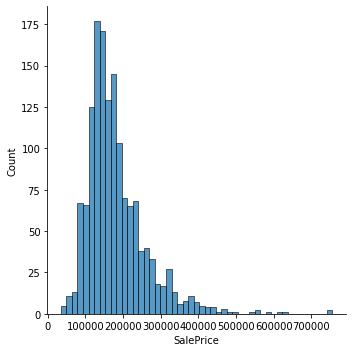

In [ ]:
sns.displot(df['SalePrice'])

As can be seen above there are a few outliers in the prices so we can limit the model for SalePrice below 500,000 for more effective machine learning


In [ ]:
len(df[df['SalePrice']>500000])

9

There are only 9 houses with prices above this value so they cna be safely discarded

In [ ]:
df=df[df['SalePrice']<500000]

In [ ]:
len(df)

1451

We have successfully removed the outliers and kept most of the data 

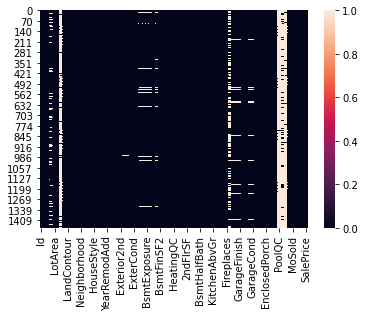

In [ ]:
sns.heatmap(df.isnull())

Now lets look at the missing values

There are columns like PoolQC etc that seems mostly empty


In [ ]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1445
MiscFeature      1397
Alley            1360
Fence            1171
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

The first three columns can be removed

In [ ]:
df.drop(columns=['PoolQC','MiscFeature','Alley']).isnull().sum().sort_values(ascending=False)

Fence            1171
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
                 ... 
CentralAir          0
HeatingQC           0
SaleCondition       0
TotalBsmtSF         0
Id                  0
Length: 78, dtype: int64

In [ ]:
df.drop(columns=['PoolQC','MiscFeature','Alley'],inplace=True)

In [ ]:
df['Fence'].value_counts()

MnPrv    156
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

From Kaggle the description of the columns is:
Fence: Fence quality
		   GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

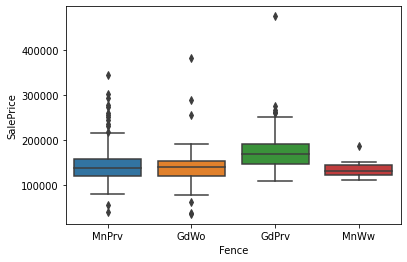

In [ ]:
sns.boxplot(x=df['Fence'],y=df['SalePrice'])

From above, most categories have similar distribution of prices so lets drop the column

In [ ]:
df.drop(columns=['Fence'],inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
                ... 
CentralAir         0
HeatingQC          0
SaleCondition      0
TotalBsmtSF        0
Id                 0
Length: 77, dtype: int64

In [ ]:
df['FireplaceQu'].value_counts()

Gd    374
TA    311
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64

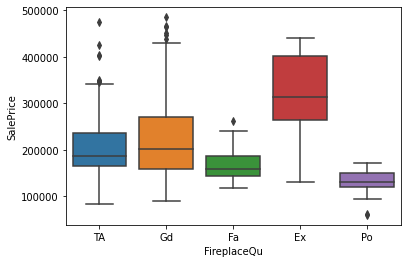

In [ ]:
sns.boxplot(x=df['FireplaceQu'],y=df['SalePrice'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

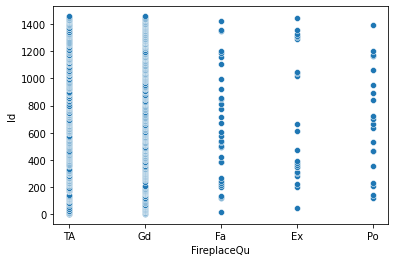

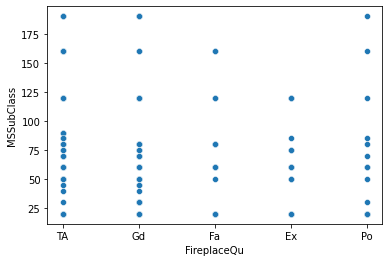

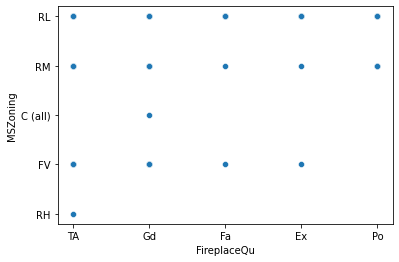

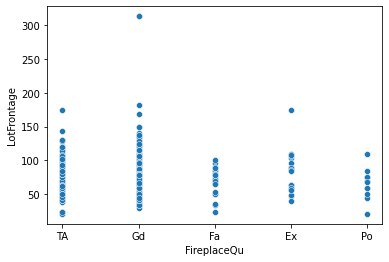

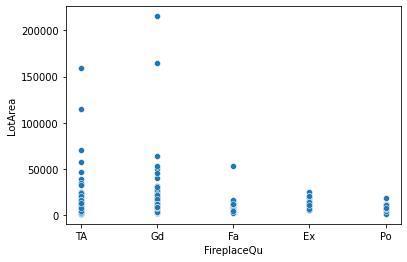

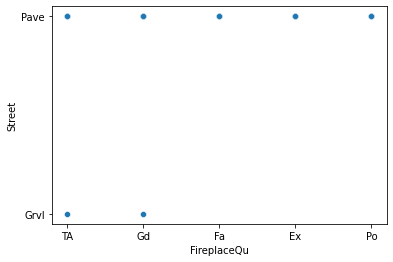

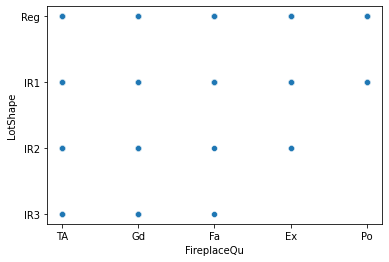

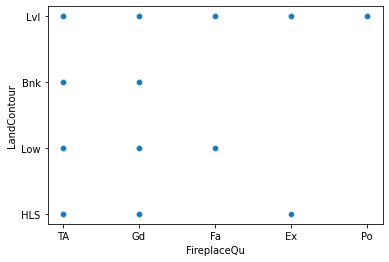

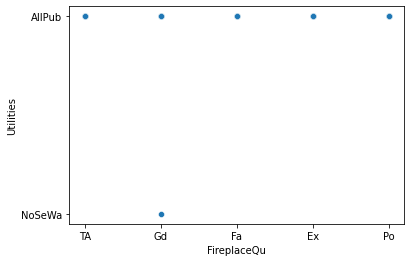

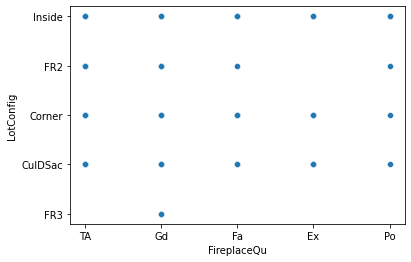

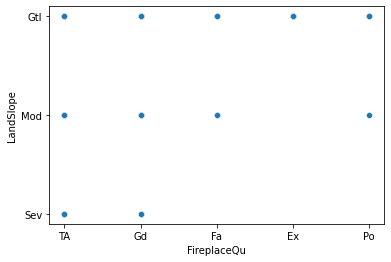

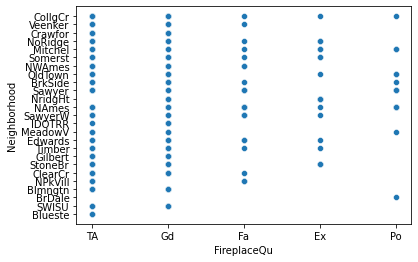

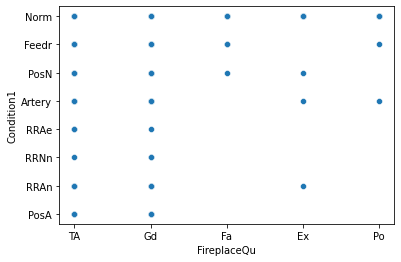

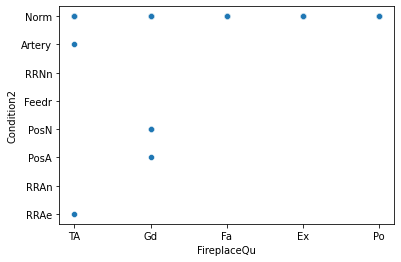

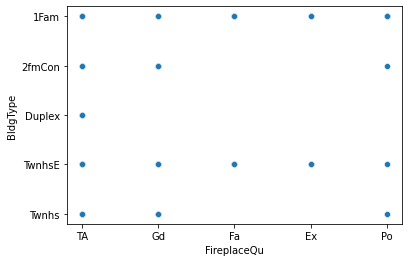

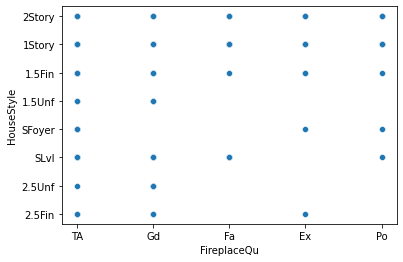

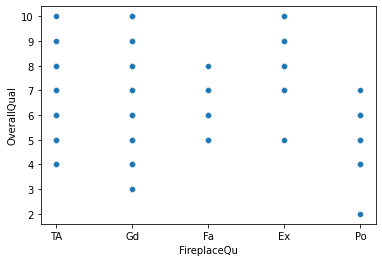

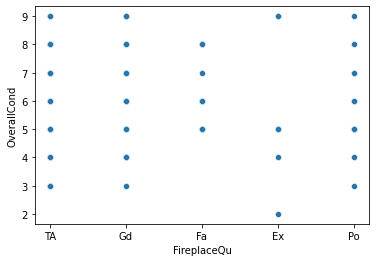

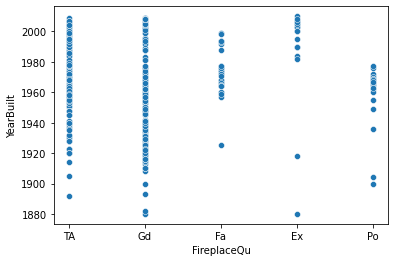

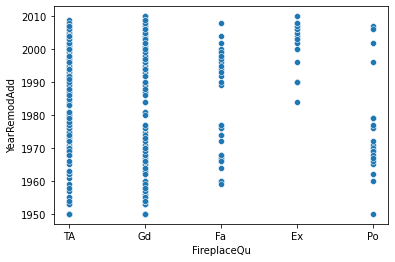

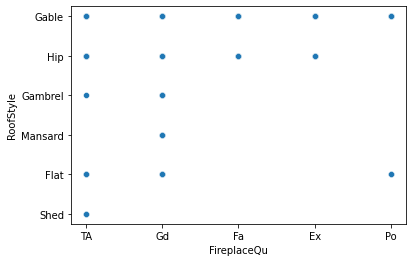

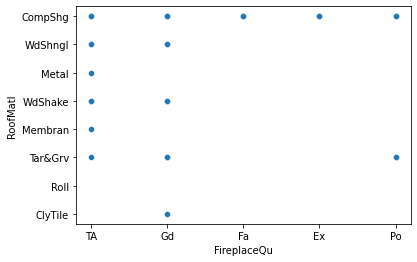

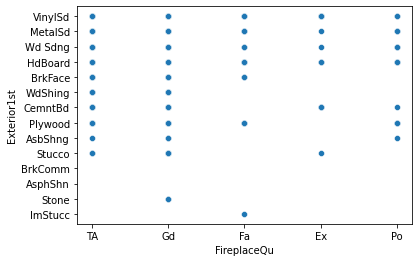

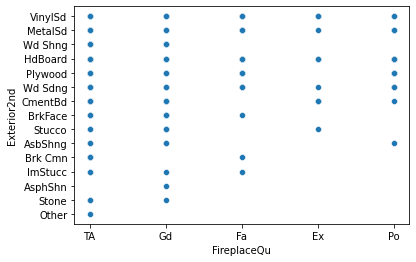

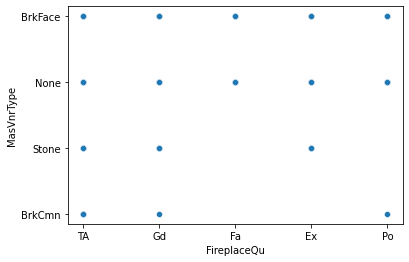

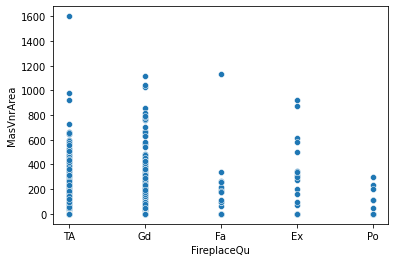

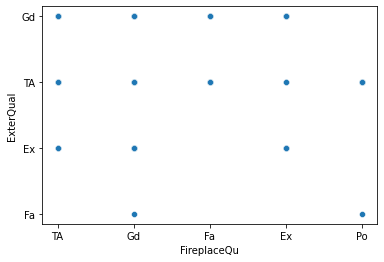

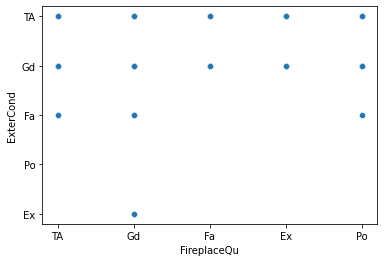

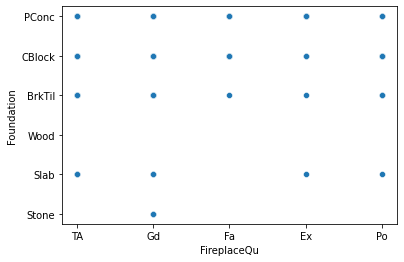

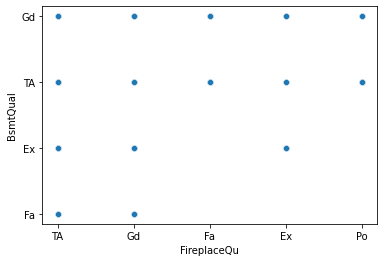

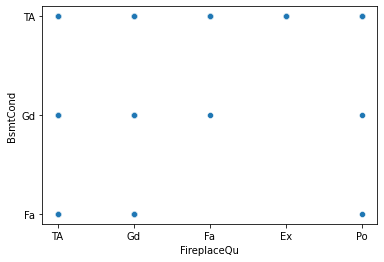

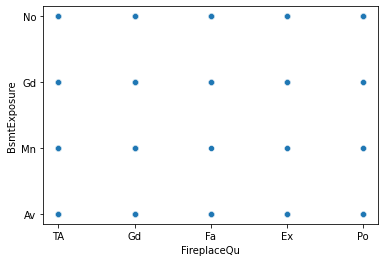

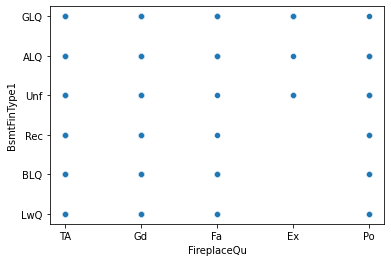

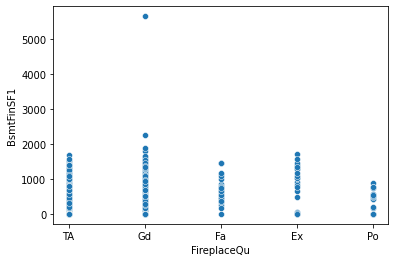

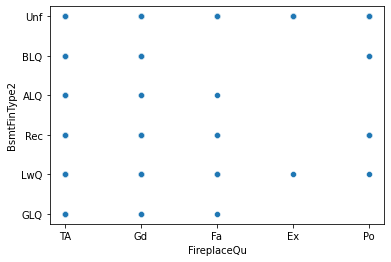

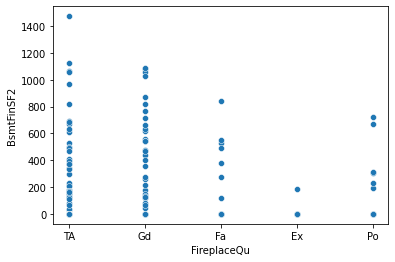

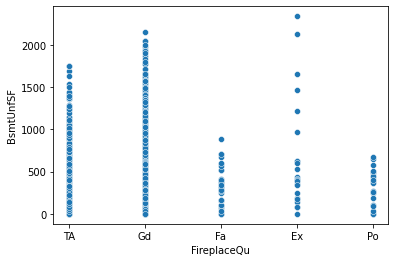

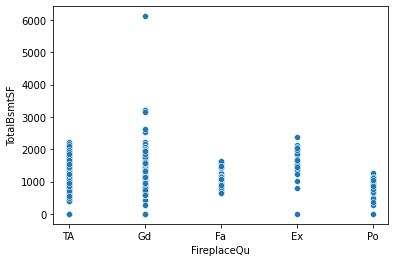

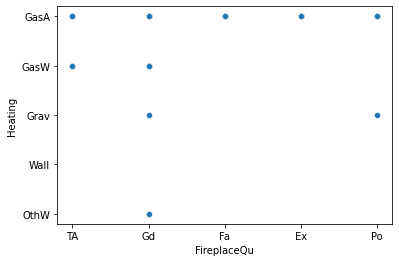

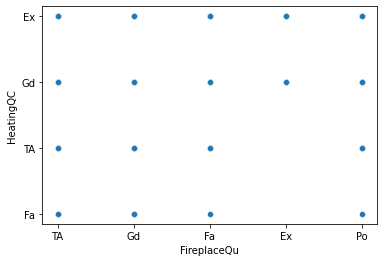

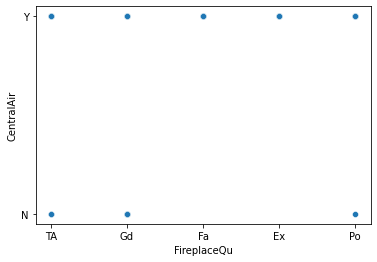

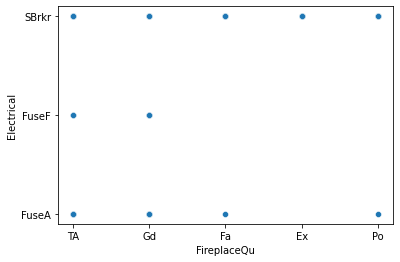

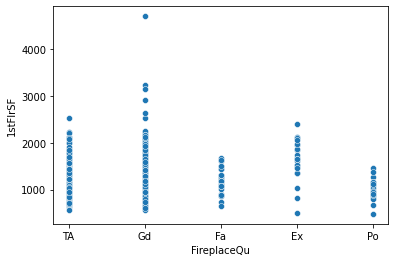

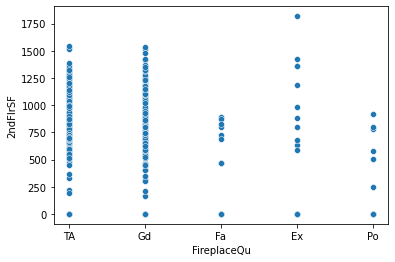

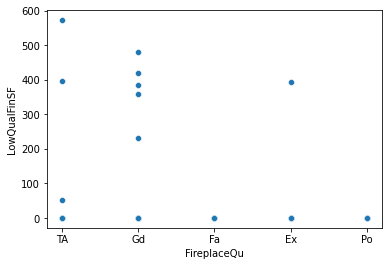

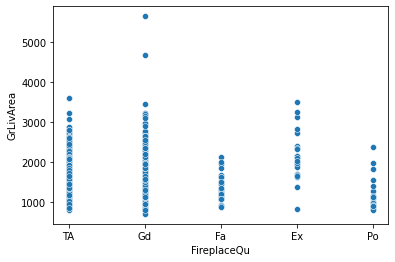

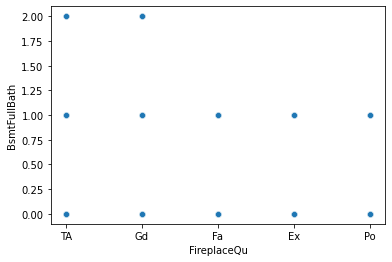

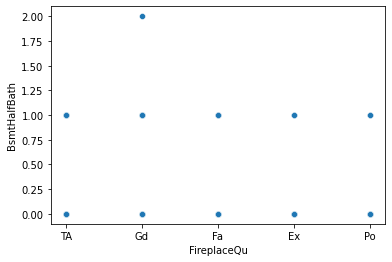

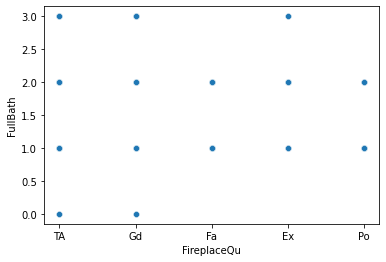

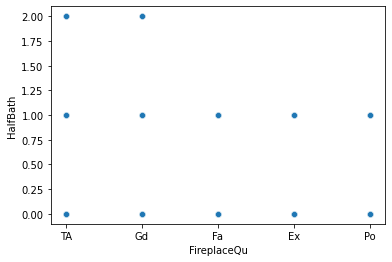

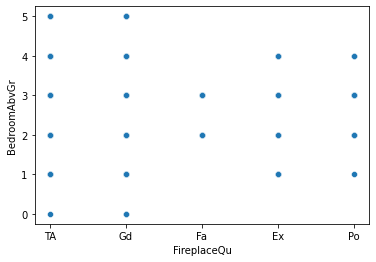

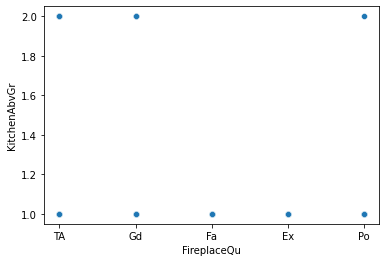

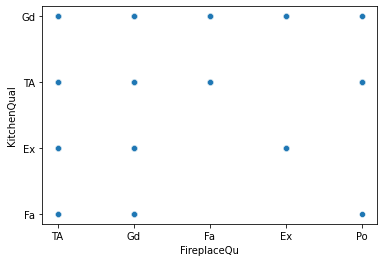

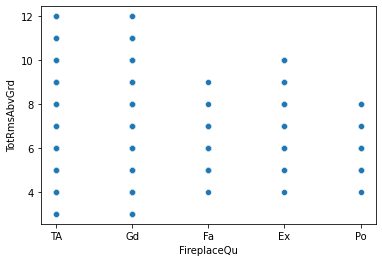

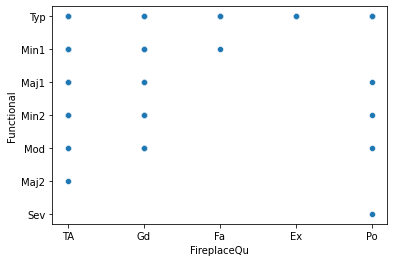

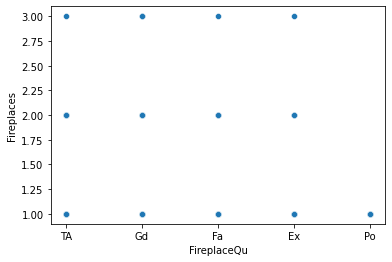

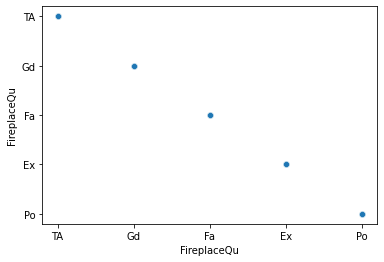

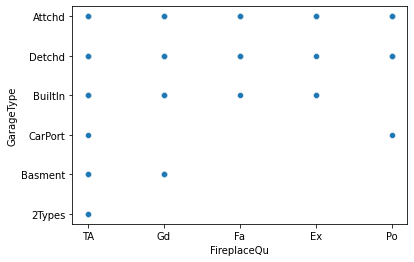

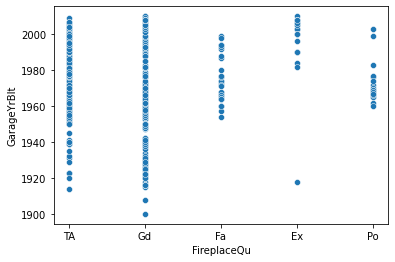

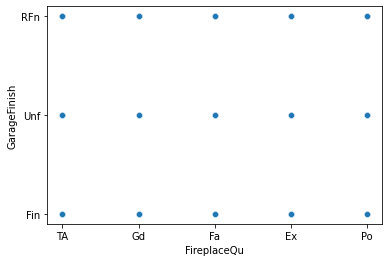

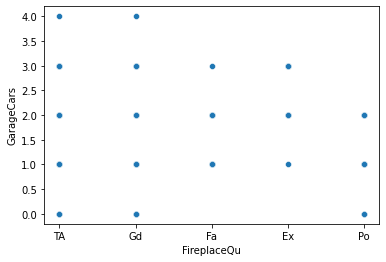

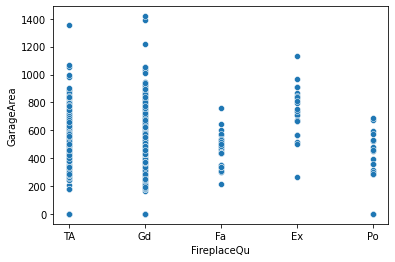

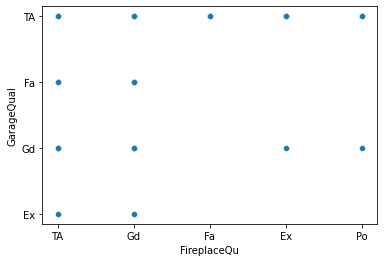

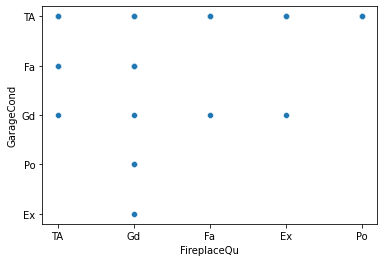

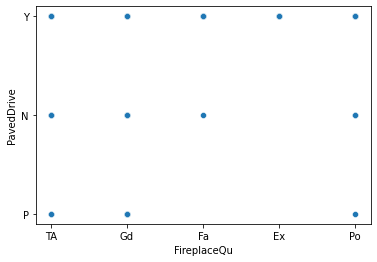

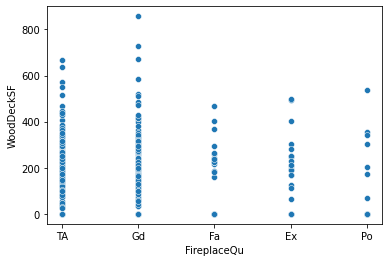

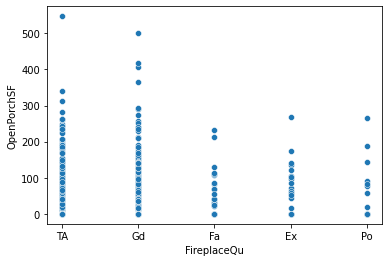

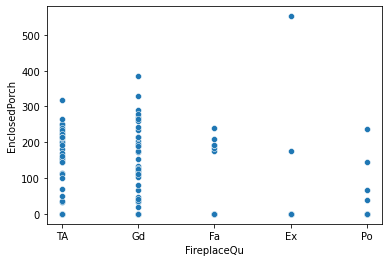

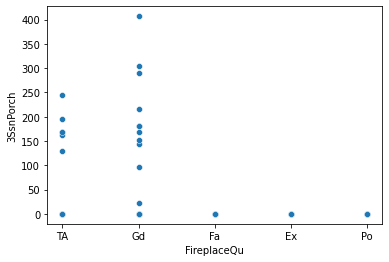

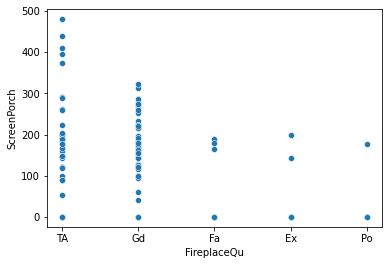

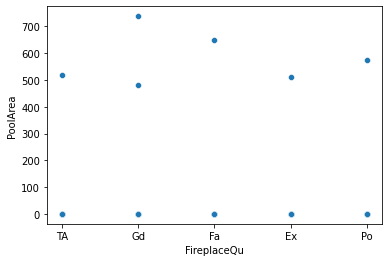

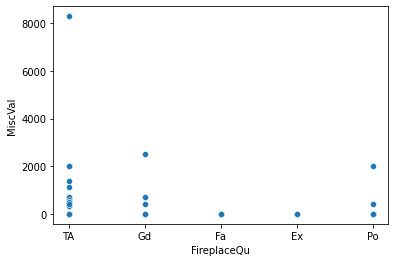

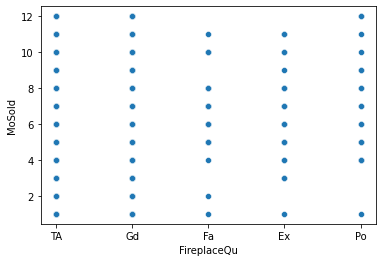

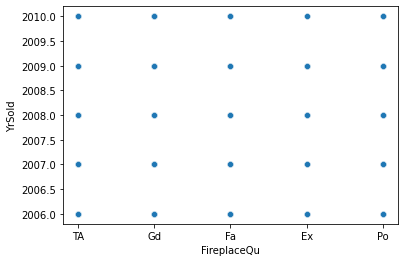

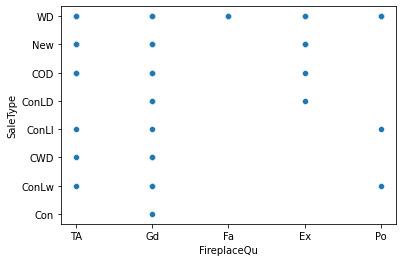

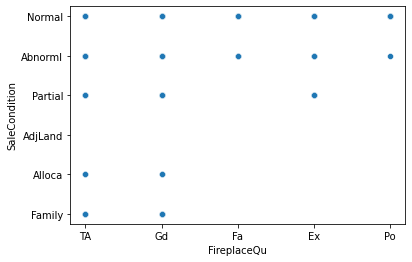

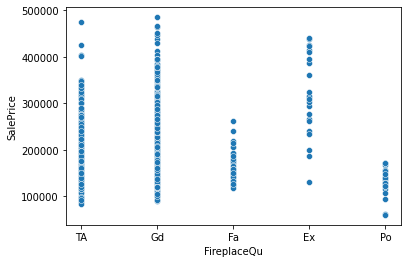

In [ ]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.scatterplot(x=df['FireplaceQu'],y=df[col])

In [ ]:
def fillfire(pair):
  condition=pair[0]
  fireplace=pair[1]
  if pd.isnull(fireplace):
    if condition=='RRAe':
      return "TA"
    elif condition=='PosA':
      return "Gd"
    else:
      return 'Gd'
  else:
    return fireplace


WE will fill the FireplaceQu column nulls by looking at the condition2 column



In [ ]:
df[['Condition2','FireplaceQu']]

,Condition2,FireplaceQu
0,Norm,NaN
1,Norm,TA
2,Norm,TA
3,Norm,Gd
4,Norm,TA
...,...,...
1455,Norm,TA
1456,Norm,TA
1457,Norm,Gd
1458,Norm,NaN


In [ ]:
df['FireplaceQu']=df[['Condition2','FireplaceQu']].apply(fillfire,axis=1)

In [ ]:
df['FireplaceQu'].value_counts()

Gd    1064
TA     311
Fa      33
Ex      23
Po      20
Name: FireplaceQu, dtype: int64

The nulls in FireplaceQU have been filled

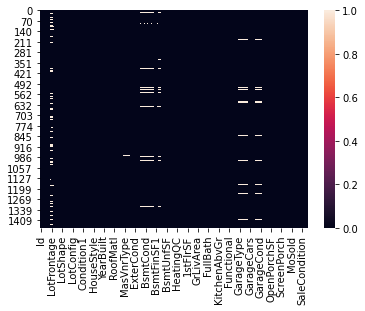

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageFinish     81
GarageType       81
GarageCond       81
GarageQual       81
               ... 
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
Id                0
Length: 77, dtype: int64

Now lets look at LotFrontage column with most nulls

In [ ]:
df['LotFrontage'].mean()

69.83305369127517

In [ ]:
def fillLF (frontage):
  if pd.isnull(frontage):
    return 69.83
  else:
    return frontage


In [ ]:
df['LotFrontage']=df['LotFrontage'].apply(fillLF)

We will fill the nulls by the average value in this case

In [ ]:
df['LotFrontage'].value_counts()

69.83     259
60.00     143
70.00      70
80.00      69
50.00      57
         ... 
106.00      1
38.00       1
138.00      1
140.00      1
137.00      1
Name: LotFrontage, Length: 110, dtype: int64

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [ ]:
df.isnull().sum().sort_values(ascending=False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
                ..
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Id               0
Length: 77, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

In [ ]:
len(df)

1451

In [ ]:
len(df.dropna())

1329

The rest of the nulls can be safely dropped

In [ ]:
df.dropna(inplace=True)

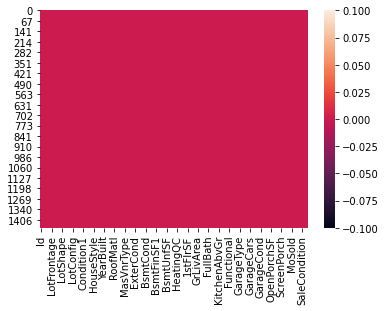

In [ ]:
sns.heatmap(df.isnull())

Looks good

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1329 non-null   int64  
 1   MSSubClass     1329 non-null   int64  
 2   MSZoning       1329 non-null   object 
 3   LotFrontage    1329 non-null   float64
 4   LotArea        1329 non-null   int64  
 5   Street         1329 non-null   object 
 6   LotShape       1329 non-null   object 
 7   LandContour    1329 non-null   object 
 8   Utilities      1329 non-null   object 
 9   LotConfig      1329 non-null   object 
 10  LandSlope      1329 non-null   object 
 11  Neighborhood   1329 non-null   object 
 12  Condition1     1329 non-null   object 
 13  Condition2     1329 non-null   object 
 14  BldgType       1329 non-null   object 
 15  HouseStyle     1329 non-null   object 
 16  OverallQual    1329 non-null   int64  
 17  OverallCond    1329 non-null   int64  
 18  YearBuil

Now lets start FEATURE ENGINEERING

In [ ]:
df['SaleCondition'].value_counts()

Normal     1100
Partial     116
Abnorml      85
Family       20
Alloca        7
AdjLand       1
Name: SaleCondition, dtype: int64

Lets merge the last two categories into normal

In [ ]:
df['SaleCondition']=df['SaleCondition'].replace(['Alloca','AdjLand'],'Normal')

In [ ]:
df['SaleCondition'].value_counts()

Normal     1108
Partial     116
Abnorml      85
Family       20
Name: SaleCondition, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['SaleCondition'],drop_first=True)

The above will convert the categorical column into boolean

In [ ]:
df['SaleType'].value_counts()

WD       1153
New       113
COD        42
ConLD       6
ConLI       4
CWD         4
ConLw       4
Con         2
Oth         1
Name: SaleType, dtype: int64

In [ ]:
df['SaleType']=df['SaleType'].replace(['ConLD','ConLw','ConLI','CWD','Con','Oth'],'WD')

In [ ]:
df['SaleType'].value_counts()

WD     1174
New     113
COD      42
Name: SaleType, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['SaleType'],drop_first=True)

In [ ]:
df=pd.get_dummies(df,columns=['FireplaceQu'],drop_first=True)

GarageQual     1329 non-null   object 
 63  GarageCond     1329 non-null   object 
 64  PavedDrive     1329 non-null   object 

In [ ]:
df['GarageQual'].value_counts()

TA    1261
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [ ]:
df['GarageQual']=df['GarageQual'].replace(['Po','Ex'],'TA')

In [ ]:
df['GarageQual'].value_counts()

TA    1267
Fa      48
Gd      14
Name: GarageQual, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['GarageQual'],drop_first=True)

In [ ]:
df['GarageCond'].value_counts()

TA    1278
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
df['GarageCond']=df['GarageCond'].replace(['Gd','Po','Ex'],'TA')

In [ ]:
df=pd.get_dummies(df,columns=['GarageCond'],drop_first=True)

In [ ]:
df['PavedDrive'].value_counts()

Y    1248
N      54
P      27
Name: PavedDrive, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['PavedDrive'],drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1329 non-null   int64  
 1   MSSubClass             1329 non-null   int64  
 2   MSZoning               1329 non-null   object 
 3   LotFrontage            1329 non-null   float64
 4   LotArea                1329 non-null   int64  
 5   Street                 1329 non-null   object 
 6   LotShape               1329 non-null   object 
 7   LandContour            1329 non-null   object 
 8   Utilities              1329 non-null   object 
 9   LotConfig              1329 non-null   object 
 10  LandSlope              1329 non-null   object 
 11  Neighborhood           1329 non-null   object 
 12  Condition1             1329 non-null   object 
 13  Condition2             1329 non-null   object 
 14  BldgType               1329 non-null   object 
 15  Hous

In [ ]:
df['GarageFinish'].value_counts()

Unf    580
RFn    412
Fin    337
Name: GarageFinish, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['GarageFinish'],drop_first=True)

In [ ]:
df['GarageType'].value_counts()

Attchd     846
Detchd     369
BuiltIn     82
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64

In [ ]:
df['GarageType']=df['GarageType'].replace(['CarPort','2Types'],'Attchd')

In [ ]:
df['GarageType'].value_counts()

Attchd     859
Detchd     369
BuiltIn     82
Basment     19
Name: GarageType, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['GarageType'],drop_first=True)

In [ ]:
df['Functional'].value_counts()

Typ     1246
Min2      30
Min1      28
Mod       10
Maj1      10
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [ ]:
df['Functional']=df['Functional'].replace(['Mod','Maj1','Maj2','Sev'],'Typ')

In [ ]:
df=pd.get_dummies(df,columns=['Functional'],drop_first=True)

In [ ]:
df['KitchenQual'].value_counts()

TA    650
Gd    567
Ex     89
Fa     23
Name: KitchenQual, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['KitchenQual'],drop_first=True)

Heating                1329 non-null   object 
 39  HeatingQC              1329 non-null   object 
 40  CentralAir             1329 non-null   object 
 41  Electrical 

In [ ]:
df['Electrical'].value_counts()

SBrkr    1233
FuseA      76
FuseF      20
Name: Electrical, dtype: int64

In [ ]:
df['Electrical']=df['Electrical'].replace(['FuseP','Mix'],'FuseF')

In [ ]:
df=pd.get_dummies(df,columns=['Electrical'],drop_first=True)

In [ ]:
df['CentralAir'].value_counts()

Y    1268
N      61
Name: CentralAir, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['CentralAir'],drop_first=True)

In [ ]:
df['HeatingQC'].value_counts()

Ex    695
TA    380
Gd    217
Fa     37
Name: HeatingQC, dtype: int64

In [ ]:
df['HeatingQC']=df['HeatingQC'].replace(['Po'],'Fa')

In [ ]:
df=pd.get_dummies(df,columns=['HeatingQC'],drop_first=True)

In [ ]:
df['Heating'].value_counts()

GasA    1309
GasW      16
Grav       3
OthW       1
Name: Heating, dtype: int64

In [ ]:
df['Heating']=df['Heating'].replace(['Grav','OthW'],'GasA')

In [ ]:
df=pd.get_dummies(df,columns=['Heating'],drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Data columns (total 94 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1329 non-null   int64  
 1   MSSubClass             1329 non-null   int64  
 2   MSZoning               1329 non-null   object 
 3   LotFrontage            1329 non-null   float64
 4   LotArea                1329 non-null   int64  
 5   Street                 1329 non-null   object 
 6   LotShape               1329 non-null   object 
 7   LandContour            1329 non-null   object 
 8   Utilities              1329 non-null   object 
 9   LotConfig              1329 non-null   object 
 10  LandSlope              1329 non-null   object 
 11  Neighborhood           1329 non-null   object 
 12  Condition1             1329 non-null   object 
 13  Condition2             1329 non-null   object 
 14  BldgType               1329 non-null   object 
 15  Hous

In [ ]:
df['BsmtFinType1'].value_counts()

GLQ    395
Unf    391
ALQ    208
BLQ    141
Rec    125
LwQ     69
Name: BsmtFinType1, dtype: int64

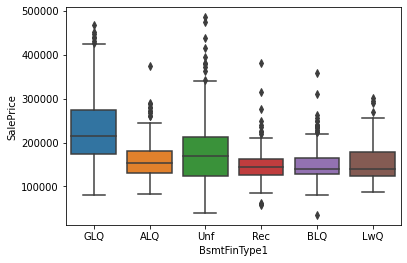

In [ ]:
sns.boxplot(x=df['BsmtFinType1'],y=df['SalePrice'])

This columns also have variation in Sale Price so should be kept


In [ ]:
df=pd.get_dummies(df,columns=['BsmtFinType1'],drop_first=True)

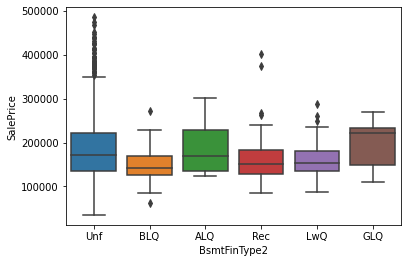

In [ ]:
sns.boxplot(x=df['BsmtFinType2'],y=df['SalePrice'])

In [ ]:
df['BsmtFinType2'].value_counts()

Unf    1168
Rec      53
LwQ      46
BLQ      32
ALQ      18
GLQ      12
Name: BsmtFinType2, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['BsmtFinType2'],drop_first=True)

ExterQual              1329 non-null   object 
 27  ExterCond              1329 non-null   object 
 28  Foundation             1329 non-null   object 
 29  BsmtQual               1329 non-null   object 
 30  BsmtCond               1329 non-null   object 
 31  BsmtExposure    

In [ ]:
df['ExterQual'].value_counts()

TA    803
Gd    474
Ex     45
Fa      7
Name: ExterQual, dtype: int64

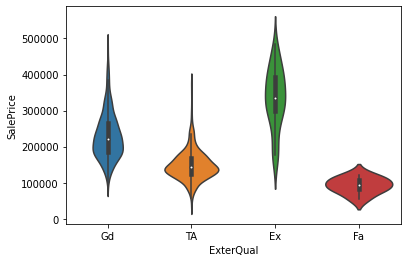

In [ ]:
sns.violinplot(x=df['ExterQual'],y=df['SalePrice'])

FA column is most similar to the TA column so maybe merged with it

In [ ]:
df['ExterQual']=df['ExterQual'].replace(['Fa'],'TA')

In [ ]:
df=pd.get_dummies(df,columns=['ExterQual'],drop_first=True)

In [ ]:
df['ExterCond'].value_counts()

TA    1175
Gd     136
Fa      16
Ex       2
Name: ExterCond, dtype: int64

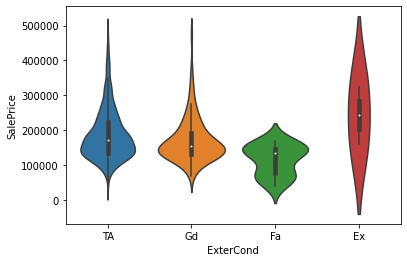

In [ ]:
sns.violinplot(x=df['ExterCond'],y=df['SalePrice'])

Not much info in Ex column since its only few values

In [ ]:
df['ExterCond']=df['ExterCond'].replace(['Ex'],'TA')

In [ ]:
df['ExterCond'].value_counts()

TA    1177
Gd     136
Fa      16
Name: ExterCond, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['ExterCond'],drop_first=True)

In [ ]:
df['Foundation'].value_counts() 

PConc     611
CBlock    580
BrkTil    129
Stone       6
Wood        3
Name: Foundation, dtype: int64

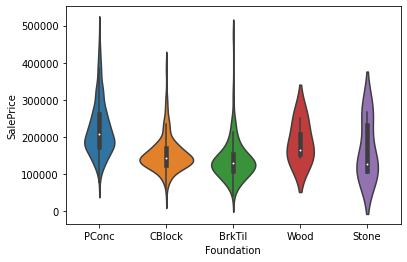

In [ ]:
sns.violinplot(x=df['Foundation'],y=df['SalePrice'])

In [ ]:
df['Foundation']=df['Foundation'].replace(['Wood','Stone'],['PConc','CBlock'])

In [ ]:
df['Foundation'].value_counts() 

PConc     614
CBlock    586
BrkTil    129
Name: Foundation, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['Foundation'],drop_first=True)

In [ ]:
df['BsmtQual'].value_counts()

TA    594
Gd    591
Ex    112
Fa     32
Name: BsmtQual, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['BsmtQual'],drop_first=True)

In [ ]:
df['BsmtCond'].value_counts()

TA    1229
Gd      62
Fa      38
Name: BsmtCond, dtype: int64

In [ ]:
df['BsmtCond']=df['BsmtCond'].replace(['Po'],'TA')

In [ ]:
df=pd.get_dummies(df,columns=['BsmtCond'],drop_first=True)

In [ ]:
df['BsmtExposure'].value_counts()

No    886
Av    211
Gd    121
Mn    111
Name: BsmtExposure, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['BsmtExposure'],drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Columns: 110 entries, Id to BsmtExposure_No
dtypes: float64(3), int64(35), object(17), uint8(55)
memory usage: 692.8+ KB


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,GarageFinish_Unf,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,Functional_Min2,Functional_Typ,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Electrical_FuseF,Electrical_SBrkr,CentralAir_Y,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Heating_GasW,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,...,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,...,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0


In [ ]:
df.dtypes

Id                   int64
MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
                    ...   
BsmtCond_Gd          uint8
BsmtCond_TA          uint8
BsmtExposure_Gd      uint8
BsmtExposure_Mn      uint8
BsmtExposure_No      uint8
Length: 110, dtype: object

In [ ]:
list(df.select_dtypes(['object']).columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType']

In [ ]:
list(df.select_dtypes(['object']).columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType']

In [ ]:
df['MSZoning'].value_counts()

RL         1057
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

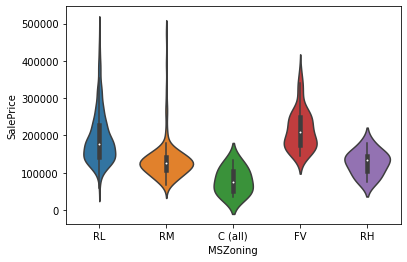

In [ ]:
sns.violinplot(x=df['MSZoning'],y=df['SalePrice'])

In [ ]:
df['MSZoning']=df['MSZoning'].replace(['C(all)','RH'],'RM')

In [ ]:
df=pd.get_dummies(df,columns=['MSZoning'],drop_first=True)

In [ ]:
df['Street'].value_counts()

Pave    1324
Grvl       5
Name: Street, dtype: int64

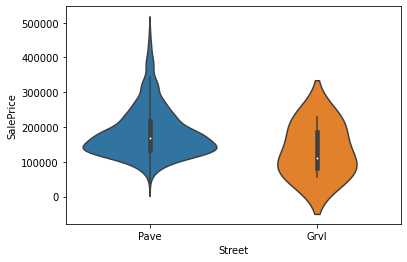

In [ ]:
sns.violinplot(x=df['Street'],y=df['SalePrice'])

This column maybe dropped since there its highly unbalanced

In [ ]:
df.drop(columns=['Street'],inplace=True)

In [ ]:
list(df.select_dtypes('object').columns)

['LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType']

In [ ]:
df['LotShape'].value_counts()

Reg    827
IR1    453
IR2     39
IR3     10
Name: LotShape, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['LotShape'],drop_first=True)

In [ ]:
df['MasVnrType'].value_counts()

None       762
BrkFace    429
Stone      123
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['MasVnrType'],drop_first=True)

In [ ]:
df['Exterior2nd'].value_counts()

VinylSd    471
MetalSd    197
HdBoard    195
Wd Sdng    176
Plywood    127
CmentBd     50
Wd Shng     31
Stucco      23
BrkFace     22
AsbShng     16
ImStucc      9
Brk Cmn      6
AsphShn      2
Stone        2
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

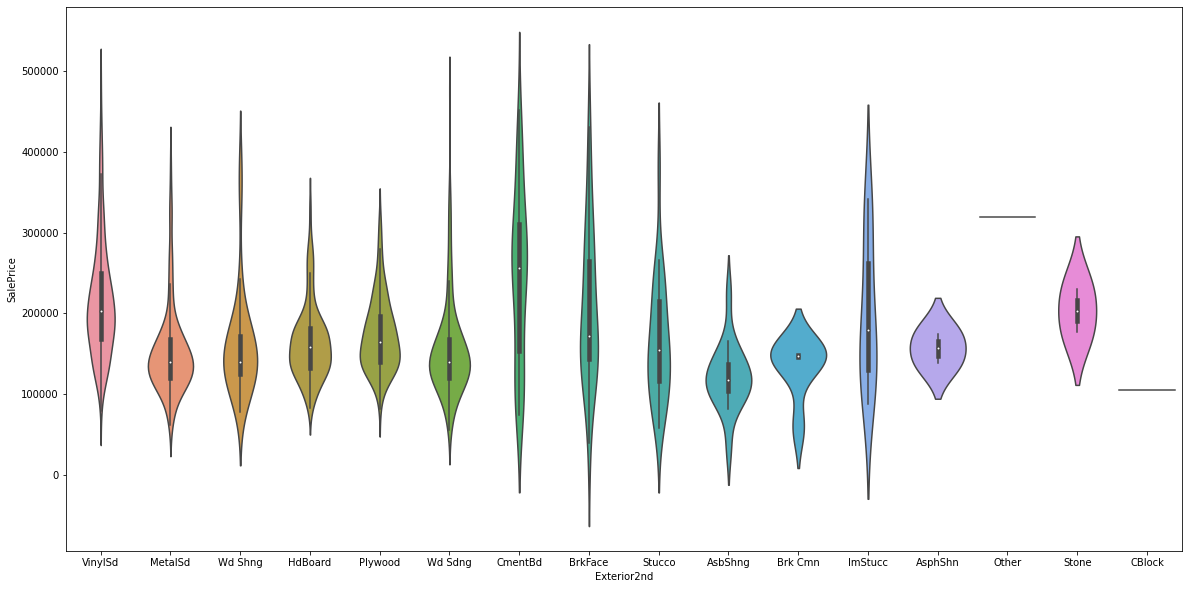

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df['Exterior2nd'],y=df['SalePrice'])

Not much variation in the column and too many categories so may be dropped

In [ ]:
df.drop(columns=['Exterior2nd'],inplace=True)

In [ ]:
list(df.select_dtypes('object').columns)

['LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st']

In [ ]:
df['LandContour'].value_counts()

Lvl    1198
Bnk      52
HLS      47
Low      32
Name: LandContour, dtype: int64

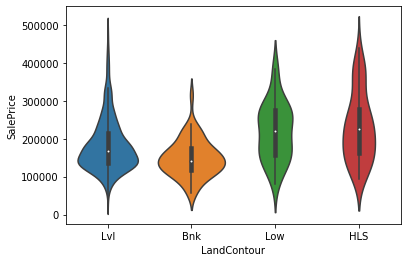

In [ ]:
sns.violinplot(x=df['LandContour'],y=df['SalePrice'])


In [ ]:
df=pd.get_dummies(df,columns=['LandContour'],drop_first=True)

In [ ]:
df['Utilities'].value_counts()

AllPub    1328
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
df.drop(columns=['Utilities'],inplace=True)

In [ ]:
df['LotConfig'].value_counts()

Inside     953
Corner     242
CulDSac     91
FR2         43
Name: LotConfig, dtype: int64

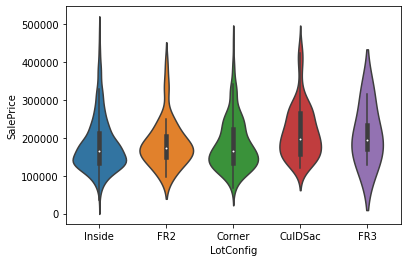

In [ ]:
sns.violinplot(x=df['LotConfig'],y=df['SalePrice'])


In [ ]:
df['LotConfig']=df['LotConfig'].replace('FR3','CulDSac')

In [ ]:
df=pd.get_dummies(df,columns=['LotConfig'],drop_first=True)

In [ ]:
df['LandSlope'].value_counts()

Gtl    1257
Mod      60
Sev      12
Name: LandSlope, dtype: int64

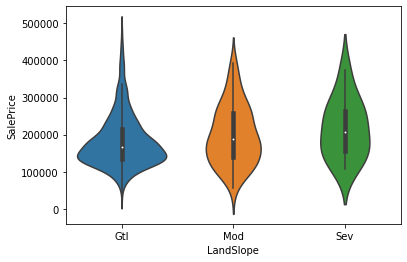

In [ ]:
sns.violinplot(x=df['LandSlope'],y=df['SalePrice'])


In [ ]:
df['LandSlope']=df['LandSlope'].replace('Sev','Mod')

In [ ]:
df['LandSlope'].value_counts()

Gtl    1257
Mod      72
Name: LandSlope, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['LandSlope'],drop_first=True)

In [ ]:
df['RoofMatl'].value_counts()

CompShg    1306
Tar&Grv       9
WdShngl       5
WdShake       5
Metal         1
Roll          1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

Highly unbalanced

In [ ]:
df.drop(columns=['RoofMatl'],inplace=True)

In [ ]:
df['Exterior1st'].value_counts()

VinylSd    482
HdBoard    209
MetalSd    201
Wd Sdng    182
Plywood    100
CemntBd     50
BrkFace     44
Stucco      21
WdShing     20
AsbShng     15
Stone        2
CBlock       1
BrkComm      1
ImStucc      1
Name: Exterior1st, dtype: int64

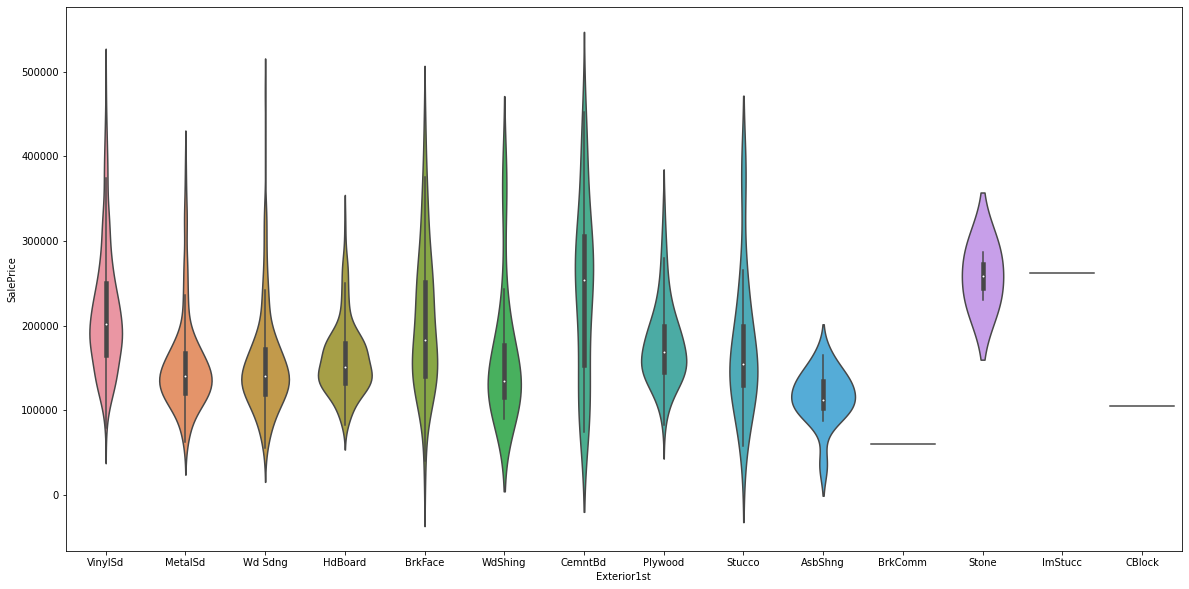

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df['Exterior1st'],y=df['SalePrice'])


In [ ]:
df['Exterior1st']=df['Exterior1st'].replace(['Stone','BrkComm','ImStucc'],['CemntBd','AsbShng','Stone'])

In [ ]:
df['Exterior1st'].value_counts()

VinylSd    482
HdBoard    209
MetalSd    201
Wd Sdng    182
Plywood    100
CemntBd     53
BrkFace     44
Stucco      21
WdShing     20
AsbShng     17
Name: Exterior1st, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['Exterior1st'],drop_first=True)

In [ ]:
list(df.select_dtypes('object').columns)

['Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle']

In [ ]:
df['RoofStyle'].value_counts()

Gable      1036
Hip         264
Flat         11
Gambrel      10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64

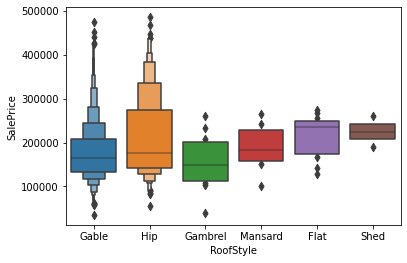

In [ ]:
sns.boxenplot(x=df['RoofStyle'],y=df['SalePrice'])

In [ ]:
df['RoofStyle']=df['RoofStyle'].replace(['Shed','Mansard'],['Flat','Hip'])

In [ ]:
df['RoofStyle'].value_counts()

Gable      1036
Hip         270
Flat         13
Gambrel      10
Name: RoofStyle, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['RoofStyle'],drop_first=True)

In [ ]:
df['HouseStyle'].value_counts()

1Story    654
2Story    420
1.5Fin    134
SLvl       64
SFoyer     30
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64

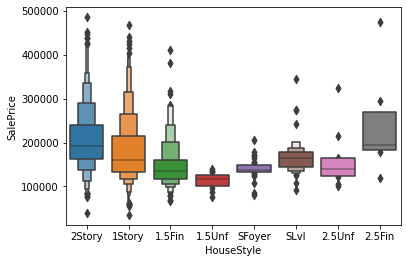

In [ ]:
sns.boxenplot(x=df['HouseStyle'],y=df['SalePrice'])

In [ ]:
df['HouseStyle']=df['HouseStyle'].replace(['2.5Fin','2.5Unf'],['2Story','1.5Fin'])

In [ ]:
df['HouseStyle'].value_counts()

1Story    654
2Story    426
1.5Fin    155
SLvl       64
SFoyer     30
Name: HouseStyle, dtype: int64

In [ ]:
df['HouseStyle']=df['HouseStyle'].replace(['1.5Unf'],['1.5Fin'])

In [ ]:
df=pd.get_dummies(df,columns=['HouseStyle'],drop_first=True)

In [ ]:
list(df.select_dtypes('object').columns)

['Neighborhood', 'Condition1', 'Condition2', 'BldgType']

ALMOST THERE

In [ ]:
df['Neighborhood'].value_counts()

NAmes      211
CollgCr    146
OldTown    100
Somerst     83
Sawyer      78
Gilbert     77
NWAmes      73
NridgHt     72
Edwards     70
Crawfor     61
IDOTRR      56
SawyerW     53
BrkSide     47
Mitchel     42
NoRidge     38
Timber      37
ClearCr     26
StoneBr     22
SWISU       20
Blmngtn     17
Name: Neighborhood, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


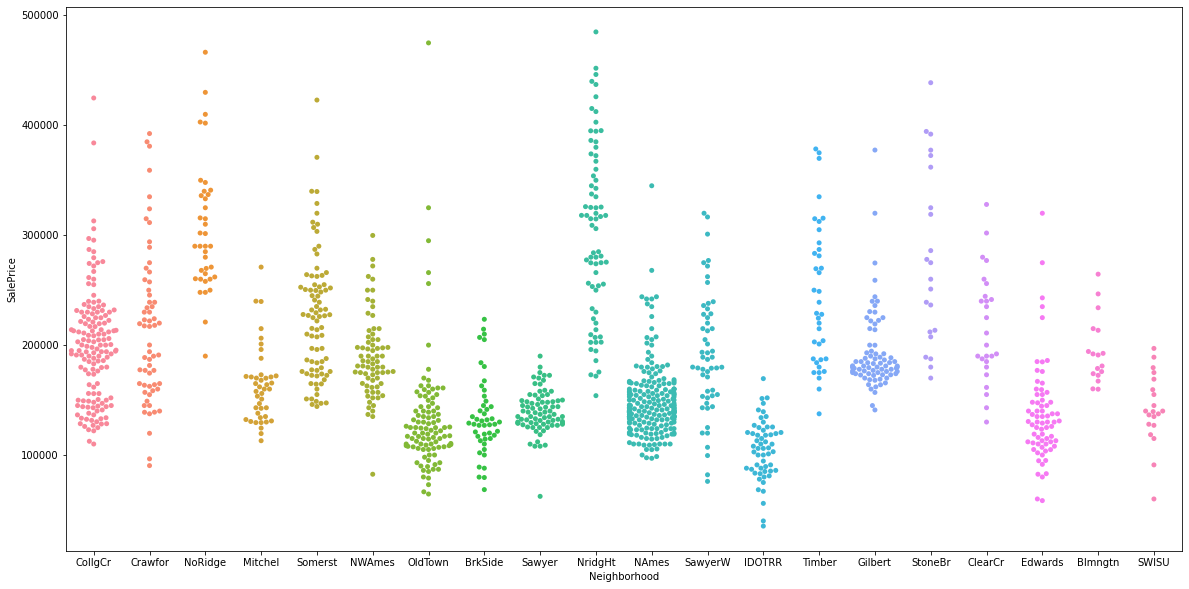

In [ ]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['Neighborhood'],y=df['SalePrice'])

In [ ]:
df['Neighborhood']=df['Neighborhood'].replace(['NPkVill','Blueste','BrDale','Blimngtn','MeadowV','Veenker'],['Sawyer','NAmes','IDOTRR','ClearCr','IDOTRR','Crawfor'])

In [ ]:
df=pd.get_dummies(df,columns=['Neighborhood'],drop_first=True)

In [ ]:
list(df.select_dtypes('object').columns)

['Condition1', 'Condition2', 'BldgType']

Norm      1153
Feedr       63
Artery      43
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


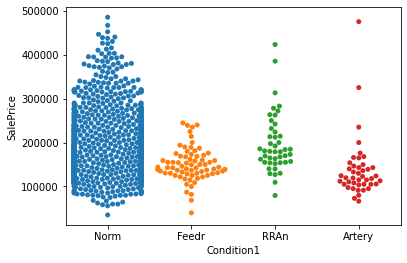

In [ ]:
sns.swarmplot(x=df['Condition1'],y=df['SalePrice'])

In [ ]:
df['Condition1']=df['Condition1'].replace(['RRAe','PosN','RRNn','PosA','RRNe'],['Feedr','RRAn','Norm','Norm','Norm'])

In [ ]:
df=pd.get_dummies(df,columns=['Condition1'],drop_first=True)

In [ ]:
df['Condition2'].value_counts()

Norm      1315
Feedr        5
PosN         2
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [ ]:
df.drop(columns=['Condition2'],inplace=True)

In [ ]:
df['BldgType'].value_counts()

1Fam      1129
TwnhsE     112
Twnhs       38
Duplex      28
2fmCon      22
Name: BldgType, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['BldgType'],drop_first=True)

DONE


In [ ]:
df.info(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Data columns (total 151 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   MSSubClass             int64  
 2   LotFrontage            float64
 3   LotArea                int64  
 4   OverallQual            int64  
 5   OverallCond            int64  
 6   YearBuilt              int64  
 7   YearRemodAdd           int64  
 8   MasVnrArea             float64
 9   BsmtFinSF1             int64  
 10  BsmtFinSF2             int64  
 11  BsmtUnfSF              int64  
 12  TotalBsmtSF            int64  
 13  1stFlrSF               int64  
 14  2ndFlrSF               int64  
 15  LowQualFinSF           int64  
 16  GrLivArea              int64  
 17  BsmtFullBath           int64  
 18  BsmtHalfBath           int64  
 19  FullBath               int64  
 20  HalfBath               int64  
 21  BedroomAbvGr           int64  
 22  KitchenAbvGr           

All columns have now been processed and ready for ML

LETS FIRST DO SOME PCA TO CHECK WHICH COLUMNS HAVE THE MOST IMPACT

In [ ]:
y=df['SalePrice']

In [ ]:
dfNY=df.drop(columns=['SalePrice'])

Lets seperate the input columns into dfNY and output into y

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dfNY)
scaled_df=scaler.transform(dfNY)

First we need to scale the data

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10) 
pca.fit(scaled_df)
df_pca=pca.transform(scaled_df)  

Decompose the data into two components

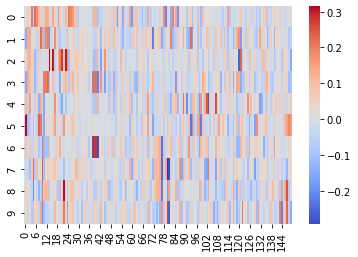

In [ ]:
sns.heatmap(pca.components_,cmap="coolwarm")

In [ ]:
pca.explained_variance_ratio_

array([0.09982368, 0.04519846, 0.03633291, 0.03124611, 0.02485054,
       0.02228022, 0.0196195 , 0.01869153, 0.0165544 , 0.0162326 ])

In [ ]:
pca.explained_variance_ratio_.sum()

0.3308299351789878

As can be seen above, if we reduce the dimensionality of data to 10 variables, only 33% of variance of data is accounted for. Therefore lets just try ML with the complete dataset


In [ ]:
#df.to_csv('PTrain')

In [ ]:
#from google.colab import files
#df.to_csv('TrainPr.csv') 
#files.download('TrainPr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lets download the processed file for future work

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Columns: 151 entries, Id to BldgType_TwnhsE
dtypes: float64(3), int64(35), uint8(113)
memory usage: 591.6 KB


In [2]:
#df=pd.read_csv("TrainPr.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Columns: 152 entries, Unnamed: 0 to BldgType_TwnhsE
dtypes: float64(3), int64(149)
memory usage: 1.5 MB


In [4]:
df.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleCondition_Family,...,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [6]:
df.set_index("Unnamed: 0")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleCondition_Family,SaleCondition_Normal,...,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,0,1,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [7]:
df.reset_index()

,index,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,...,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,0,0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1324,1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1325,1325,1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1326,1326,1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1327,1327,1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleCondition_Family,SaleCondition_Normal,...,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
df.sample(20)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_New,SaleType_WD,...,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
1312,1441,70,79.00,11526,6,7,1922,1994,0.0,0,0,588,588,1423,748,2555,0,0,2,0,3,1,11,1,1993.0,2,672,431,0,0,0,0,9,2008,191000,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
208,231,20,73.00,8760,6,6,1959,1959,220.0,0,0,1194,1194,1194,0,1194,1,0,1,0,3,1,6,0,1959.0,1,312,0,0,120,0,0,4,2010,148000,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
134,148,60,69.83,9505,7,5,2001,2001,180.0,0,0,884,884,884,1151,2035,0,0,2,1,3,1,8,1,2001.0,2,434,144,48,0,0,0,5,2010,222500,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
310,341,60,85.00,14191,8,5,2002,2002,0.0,0,0,967,967,993,915,1908,0,0,2,1,4,1,9,0,2002.0,2,431,135,0,0,0,0,4,2010,202900,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1070,1179,50,54.00,7681,5,6,1921,1950,0.0,0,0,731,731,820,523,1343,0,0,1,1,3,1,7,1,1921.0,1,186,192,0,102,0,0,7,2009,154900,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
514,566,70,66.00,6858,6,4,1915,1950,0.0,0,0,806,806,841,806,1647,1,0,1,1,4,1,6,0,1920.0,1,216,0,66,136,0,0,5,2010,128000,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1280,1407,85,70.00,8445,5,7,1972,2007,0.0,656,0,112,768,768,0,768,1,0,1,0,2,1,5,0,1988.0,2,396,58,0,0,0,0,3,2009,133000,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1012,1115,20,90.00,5400,5,7,1954,2000,0.0,415,0,418,833,833,0,833,0,0,1,0,2,1,4,0,1955.0,1,326,0,0,0,0,0,8,2006,117000,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1244,1370,20,48.00,10635,8,5,2003,2003,171.0,370,972,315,1657,1668,0,1668,1,0,2,0,3,1,8,1,2003.0,2,502,0,262,0,0,0,5,2010,232000,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
653,718,20,80.00,10000,5,6,1973,2000,0.0,1084,0,92,1176,1178,0,1178,0,1,1,1,3,1,5,1,1973.0,2,439,224,0,0,0,0,11,2008,157000,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
df['LowQualFinSF'].value_counts()

0    1213
1     116
Name: SaleCondition_Partial, dtype: int64

This is a highly unbalanced column so lets remove it

In [13]:
df.drop(columns=['LowQualFinSF'],inplace=True)

In [19]:
df['MiscVal'].value_counts()

0        1282
400        10
500         7
700         5
600         4
2000        4
450         3
480         2
800         1
1150        1
620         1
15500       1
1400        1
1200        1
2500        1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64

In [18]:
df.drop(columns=['PoolArea'],inplace=True)

In [20]:
df['EnclosedPorch'].value_counts()

0      1146
112      15
96        5
192       5
216       5
       ... 
242       1
123       1
248       1
198       1
552       1
Name: EnclosedPorch, Length: 109, dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression

In [26]:
modelLG=LinearRegression()

In [29]:
X=df.drop(['SalePrice','Id'],axis=1)

X is now the imput dataframe


In [30]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_New,SaleType_WD,FireplaceQu_Fa,FireplaceQu_Gd,...,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,2,2008,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,5,2007,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,9,2008,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,2,2006,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,12,2008,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
y=df['SalePrice']

In [32]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1324    175000
1325    210000
1326    266500
1327    142125
1328    147500
Name: SalePrice, Length: 1329, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Split the data into test and train groups

In [36]:
modelLG.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
predictLG=modelLG.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
df['SalePrice'].mean()

183909.89992475545

In [56]:
mse=mean_squared_error(y_test,predictLG)
print(f"The mean squared error is {mse} and the root mean square error is {mse**0.5}")
print(f"The mean absolute error is {mean_absolute_error(y_test,predictLG)}")
print("Error as % of Mean Price",mse**0.5/df['SalePrice'].mean()*100)
print(f"The R-Squared value of the model is {r2_score(y_test,predictLG)}")

The mean squared error is 788994130.7972105 and the root mean square error is 28089.03933560581
The mean absolute error is 19123.29799540187
Error as % of Mean Price 15.27326117142041
The R-Squared value of the model is 0.8539962311602513


R squared value is quite high 85% which mean 85% of the variance is explained by the model

The root mean squared error is quite high. Its 15% of the mean price


Lets check if our error is normally distributed

In [49]:
error=y_test-predictLG

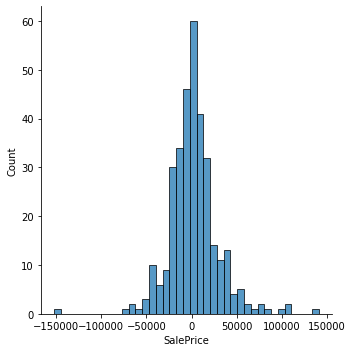

In [50]:
sns.displot(error)

So the error is normally distributed which means that the model is working but is not accurate enough

Lets now try regularized regression

Since we may be overfitting the data

In [57]:
predictLGT=modelLG.predict(X_train)

In [62]:
print(r2_score(y_train,predictLGT))
print(np.sqrt(mean_squared_error(y_train,predictLGT)))

0.9024183327089538
21805.247104489943


The metrics are a little better so overfitting might  be the issue

In [54]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [82]:
modelR=Ridge(alpha=1)

In [83]:
modelR.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [84]:
predictR=modelR.predict(X_test)

In [85]:
errorR=y_test-predictR

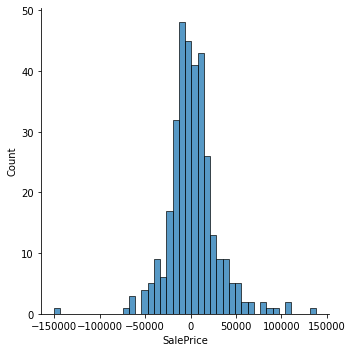

In [86]:
sns.displot(errorR)

In [87]:
print(f"The root mean square error is {mean_squared_error(y_test,predictR)**0.5} for Ridge regression")
print(f"The root R squared value is {r2_score(y_test,predictR)}")

The root mean square error is 27645.187904641225 for Ridge regression
The root R squared value is 0.858573958297367


The performance of the Ridge regressor is not much better

In [93]:
modelLasso=Lasso(alpha=0.1)

In [109]:
modelLasso.fit(X_train.values,y_train.values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236836230317.98816, tolerance: 485303171.4146251
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
predictLasso=modelLasso.predict(X_test.values)

In [111]:
print(f"The root mean square error is {mean_squared_error(y_test,predictLasso)**0.5} for Lasso regression")
print(f"The root R squared value is {r2_score(y_test,predictLasso)}")

The root mean square error is 28079.147249576614 for Lasso regression
The root R squared value is 0.8540990490251931


Nearly the same performance
OVERFITTING IS NOT THE ISSUE HERE

In [105]:
modelElastic=ElasticNet(alpha=0.01)

In [112]:
modelElastic.fit(X_train.values,y_train.values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273321927284.5549, tolerance: 485303171.4146251
  positive)


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
predictElastic=modelElastic.predict(X_test.values)

In [114]:
print(f"The root mean square error is {mean_squared_error(y_test,predictElastic)**0.5} for Elastic regression")
print(f"The root R squared value is {r2_score(y_test,predictElastic)}")

The root mean square error is 26814.068621155257 for Elastic regression
The root R squared value is 0.866949740212819


Elastic regression has the best performance but only slightly

Now lets try Support Vector Machines

In [115]:
from sklearn.svm import SVR

In [159]:
modelSVR1=SVR(C=0.1,kernel='poly')

C is the regularization parameter and epsilon in the tolerance level for the Support Vector Planes

In [160]:
modelSVR1.fit(X_train.values,y_train.values)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [161]:
predictSVR=modelSVR1.predict(X_test)

In [162]:
errorSVR=y_test-predictSVR

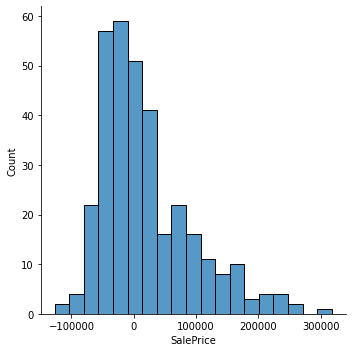

In [163]:
sns.displot(errorSVR)

In [164]:
print(f"Root Mean Squared Error for SVR is {mean_squared_error(y_test,predictSVR)**0.5}")

Root Mean Squared Error for SVR is 76063.17158122617


In [165]:
print(f"The R Squared value for the SVR is {r2_score(y_test,predictSVR)}")

The R Squared value for the SVR is -0.07062937278619774


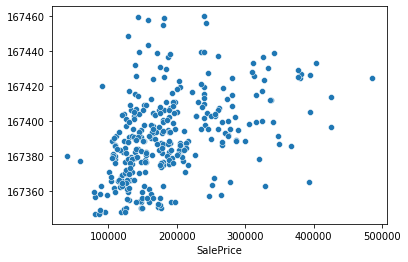

In [141]:
sns.scatterplot(x=y_test,y=predictSVR)

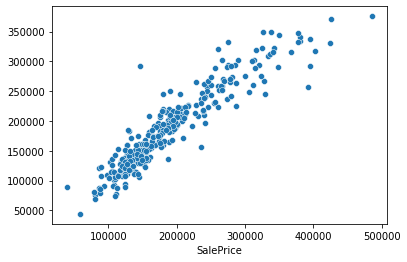

In [143]:
sns.scatterplot(x=y_test,y=predictElastic)

So SVR are not performing well mainly due to the very high number of input columns

Lets now try the Random Forest Regressor


In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
modelRF=RandomForestRegressor()

In [168]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [169]:
predictRF=modelRF.predict(X_test)

In [170]:
error=y_test-predictRF

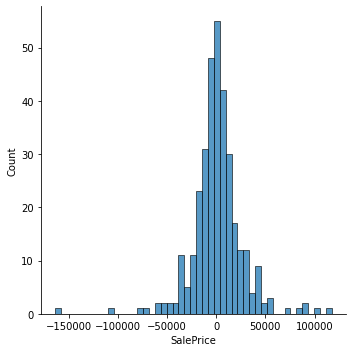

In [171]:
sns.displot(error)

Model has trained well

In [173]:
rmse=mean_squared_error(y_test,predictRF)**0.5

In [175]:
print(f"The root mean squared error is {rmse} for Random Forest")

The root mean squared error is 25999.706906968535 for Random Forest


In [176]:
print(f"The root mean squared error is {r2_score(y_test,predictRF)} for Random Forest")

The root mean squared error is 0.8749086733652212 for Random Forest


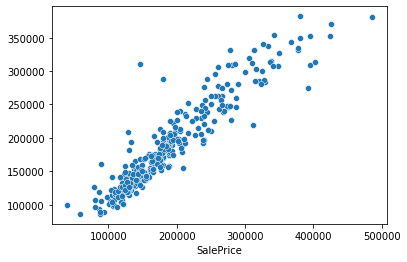

In [177]:
sns.scatterplot(x=y_test,y=predictRF)

Its a good fit

In conclusions
The linear Elastic model and Random Forest model provide the best estimation

In [178]:
modelRF.feature_importances_

array([2.48397447e-03, 1.19003541e-02, 1.63069256e-02, 5.16268755e-01,
       5.52788748e-03, 1.28809329e-02, 9.29789438e-03, 5.14884328e-03,
       2.85472106e-02, 9.09889600e-04, 6.64793702e-03, 4.79486945e-02,
       2.73825403e-02, 6.15708756e-03, 1.37347528e-01, 1.40265881e-03,
       9.96924080e-05, 1.34711324e-02, 8.79602158e-04, 1.75793572e-03,
       5.29204719e-04, 2.00108870e-03, 2.15426953e-03, 4.81401590e-03,
       3.39747854e-02, 1.96339235e-02, 4.76398138e-03, 5.36903596e-03,
       1.09519711e-03, 1.26971923e-03, 2.02237962e-04, 3.89003698e-03,
       1.59185508e-03, 3.80724572e-04, 9.17214098e-04, 3.33863716e-04,
       2.61510162e-04, 2.80121926e-04, 2.71958909e-05, 4.04977833e-04,
       5.24316008e-05, 3.34944315e-04, 3.99886699e-05, 2.56524337e-04,
       6.66276344e-05, 5.16485888e-05, 1.38517908e-04, 5.80042618e-04,
       3.99317715e-03, 5.08132991e-05, 1.50959252e-04, 1.84529231e-03,
       2.78237388e-05, 6.27221407e-05, 6.60113151e-05, 2.91359988e-03,
      

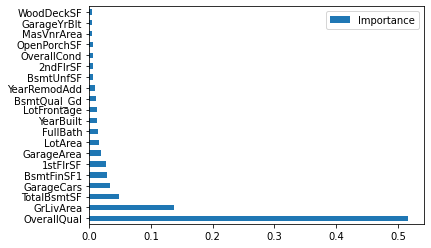

In [196]:
def importantFeatures(model,df):
    importance = model.feature_importances_
    importance = pd.DataFrame(importance,index=df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=True)
importance = feat_importance(modelRF,X)
importance[:]
importance[:20].plot(kind='barh')

In [190]:
importance[:20].index

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1',
       '1stFlrSF', 'GarageArea', 'LotArea', 'FullBath', 'YearBuilt',
       'LotFrontage', 'BsmtQual_Gd', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF',
       'OverallCond', 'OpenPorchSF', 'MasVnrArea', 'GarageYrBlt',
       'WoodDeckSF'],
      dtype='object')

These are most important columns as per the Random Forest

In [191]:
to_keep = importance[importance['Importance'] > 0.01].index
df_pro = df[to_keep]

In [192]:
df_pro

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,BsmtFinSF1,1stFlrSF,GarageArea,LotArea,FullBath,YearBuilt,LotFrontage,BsmtQual_Gd
0,7,1710,856,2,706,856,548,8450,2,2003,65.0,1
1,6,1262,1262,2,978,1262,460,9600,2,1976,80.0,1
2,7,1786,920,2,486,920,608,11250,2,2001,68.0,1
3,7,1717,756,3,216,961,642,9550,1,1915,60.0,0
4,8,2198,1145,3,655,1145,836,14260,2,2000,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,6,1647,953,2,0,953,460,7917,2,1999,62.0,1
1325,6,2073,1542,2,790,2073,500,13175,2,1978,85.0,1
1326,7,2340,1152,1,275,1188,252,9042,2,1941,66.0,0
1327,5,1078,1078,1,49,1078,240,9717,1,1950,68.0,0


In [194]:
from google.colab import files
df.to_csv('TrainPr.csv') 
files.download('TrainPr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now lets try Tensor Flow

In [201]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
myscaler=MinMaxScaler()

In [204]:
X_trainTF=myscaler.fit_transform(X_train.values)

In [205]:
X_testTF=myscaler.transform(X_test.values)

In [224]:
X_trainTF.shape

(996, 146)

In [197]:
from tensorflow import keras

In [198]:
from keras.layers import Dense,Dropout

In [199]:
from keras.models import Sequential

In [200]:
modelTF=Sequential()

In [253]:
modelTF.add(Dense(146,activation='relu')) # first layer with 146 neurons and ReLU
modelTF.add(Dense(50,activation='relu')) #second layer with 32 neuron and ReLU
#modelTF.add(Dropout(0.5))
modelTF.add(Dense(10,activation='relu')) # third layer with 16 neurons and ReLU
#modelTF.add(Dropout(0.5))
modelTF.add(Dense(1,activation='linear')) # third layer with 1 neurons and ReLU

In [254]:
modelTF.compile(optimizer='rmsprop',
              loss='mse')

In [255]:
modelTF.fit(x=X_trainTF,y=y_train,
             validation_data=(X_testTF,y_test), ##### this will allow for the output of error after every epoch
             batch_size=128,epochs=400)

Epoch 1/400
8/8 [==============================] - 3s 44ms/step - loss: 21827506631.1111 - val_loss: 9019129856.0000
Epoch 2/400
8/8 [==============================] - 0s 12ms/step - loss: 15278564579.5556 - val_loss: 9312744448.0000
Epoch 3/400
8/8 [==============================] - 0s 11ms/step - loss: 16184719587.5556 - val_loss: 6434001408.0000
Epoch 4/400
8/8 [==============================] - 0s 12ms/step - loss: 17717949553.7778 - val_loss: 14596335616.0000
Epoch 5/400
8/8 [==============================] - 0s 14ms/step - loss: 16309780366.2222 - val_loss: 12674146304.0000
Epoch 6/400
8/8 [==============================] - 0s 14ms/step - loss: 15824826254.2222 - val_loss: 10889404416.0000
Epoch 7/400
8/8 [==============================] - 0s 12ms/step - loss: 15864815502.2222 - val_loss: 9551017984.0000
Epoch 8/400
8/8 [==============================] - 0s 12ms/step - loss: 18796558791.1111 - val_loss: 10861676544.0000
Epoch 9/400
8/8 [==============================] - 0s 12ms/s

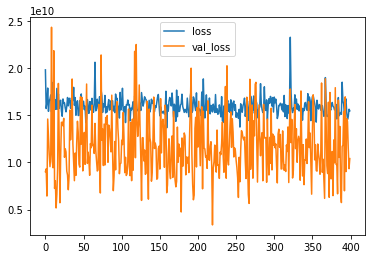

In [256]:
lossError=pd.DataFrame(modelTF.history.history)
lossError.plot()


In [244]:
predictTF=modelTF.predict(X_testTF).reshape(333,)

In [245]:
error=y_test-predictTF

In [246]:
predictTF.shape

(333,)

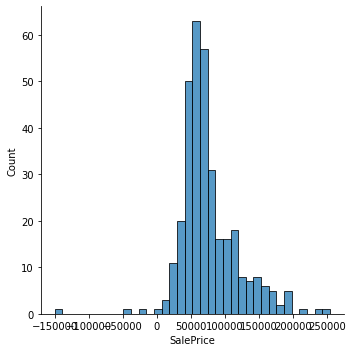

In [247]:
sns.displot(error)

In [248]:
print(f"TensorFlow root mean square error is {mean_squared_error(y_test,predictTF)**0.5}")

TensorFlow root mean square error is 86307.81515350187


Deep learning is not suitable here due to the low number of data points